Nama : Hildatul Wardah
---
Link dataset: https://www.kaggle.com/datasets/marslinoedward/sms-spam-dataset



In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('spam.csv')
df.head()

,Unnamed: 0,spamORham,Message
0,0,ham,"Go until jurong point, crazy.. Available only ..."
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   spamORham   5572 non-null   object
 2   Message     5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB
None


In [6]:
print(df.tail())

      Unnamed: 0 spamORham                                            Message
5567        5567      spam  This is the 2nd time we have tried 2 contact u...
5568        5568       ham              Will Ì_ b going to esplanade fr home?
5569        5569       ham  Pity, * was in mood for that. So...any other s...
5570        5570       ham  The guy did some bitching but I acted like i'd...
5571        5571       ham                         Rofl. Its true to its name


In [7]:
spam_or_ham = pd.get_dummies(df['spamORham'])
df_new = pd.concat([df, spam_or_ham], axis=1)

In [ ]:
df_new = df_new.drop(columns=['spamORham'])

In [8]:
messages = df_new['Message'].values
labels = df_new[['ham', 'spam']].values

In [9]:
messages_train, messages_test, labels_train, labels_test = train_test_split(messages, labels, test_size=0.2, random_state=42)

In [10]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(messages_train)
sequences_train = tokenizer.texts_to_sequences(messages_train)
sequences_test = tokenizer.texts_to_sequences(messages_test)

padded_train = pad_sequences(sequences_train)
padded_test = pad_sequences(sequences_test, maxlen=padded_train.shape[1])

In [11]:
model = tf.keras.Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=16),
    LSTM(64),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          127280    
                                                                 
 lstm (LSTM)                 (None, 64)                20736     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 164722 (643.45 KB)
Trainable params: 164722 (643.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.9 and logs.get('val_accuracy')>0.9):
      self.model.stop_training = True
      print("\nThe accuracy of the training set and the validation set has reached > 90%!")
callbacks = myCallback()

In [13]:
history = model.fit(padded_train, labels_train, epochs=10, validation_data=(padded_test, labels_test), verbose=2)

Epoch 1/10
140/140 - 18s - loss: 0.2149 - accuracy: 0.9212 - val_loss: 0.0692 - val_accuracy: 0.9785 - 18s/epoch - 129ms/step
Epoch 2/10
140/140 - 6s - loss: 0.0234 - accuracy: 0.9935 - val_loss: 0.0591 - val_accuracy: 0.9830 - 6s/epoch - 41ms/step
Epoch 3/10
140/140 - 5s - loss: 0.0067 - accuracy: 0.9978 - val_loss: 0.0991 - val_accuracy: 0.9821 - 5s/epoch - 36ms/step
Epoch 4/10
140/140 - 3s - loss: 0.0031 - accuracy: 0.9993 - val_loss: 0.0690 - val_accuracy: 0.9839 - 3s/epoch - 20ms/step
Epoch 5/10
140/140 - 4s - loss: 0.0022 - accuracy: 0.9991 - val_loss: 0.0774 - val_accuracy: 0.9821 - 4s/epoch - 27ms/step
Epoch 6/10
140/140 - 2s - loss: 0.0018 - accuracy: 0.9993 - val_loss: 0.0832 - val_accuracy: 0.9794 - 2s/epoch - 16ms/step
Epoch 7/10
140/140 - 3s - loss: 2.8956e-04 - accuracy: 1.0000 - val_loss: 0.0972 - val_accuracy: 0.9848 - 3s/epoch - 18ms/step
Epoch 8/10
140/140 - 3s - loss: 4.3908e-05 - accuracy: 1.0000 - val_loss: 0.1065 - val_accuracy: 0.9857 - 3s/epoch - 18ms/step
Epoch

In [14]:
train_accuracy = model.evaluate(padded_train, labels_train, verbose=0)[1]
test_accuracy = model.evaluate(padded_test, labels_test, verbose=0)[1]

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Training Accuracy: 1.0000
Test Accuracy: 0.9848


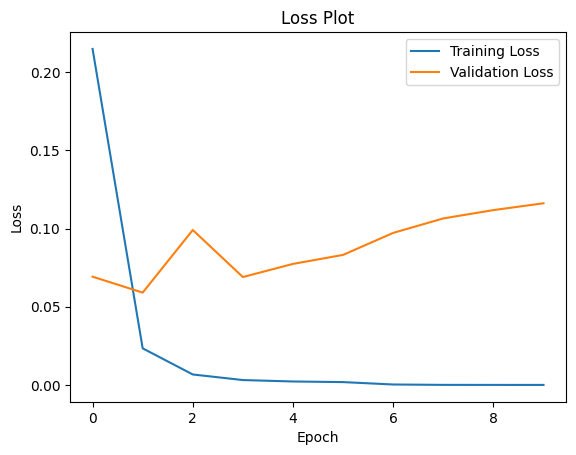

In [15]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.legend()
plt.show()


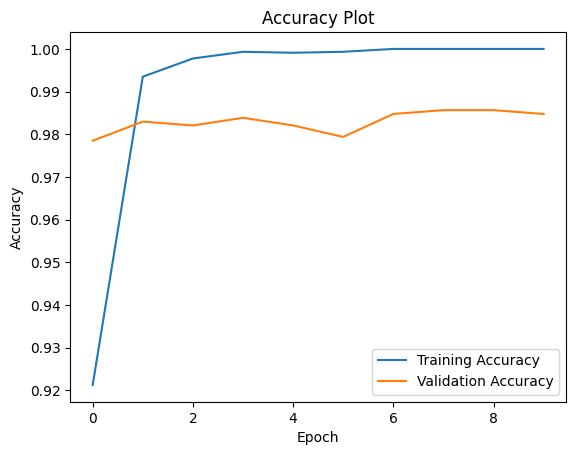

In [16]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.legend()
plt.show()